# Zomato Dataset Analysis

## Executive Summary

This project analyzes the Zomato restaurant dataset to identify rating trends, cuisine popularity, and location-based patterns.

Key Findings:
• Votes show a stronger correlation with ratings (0.43) compared to price (0.38).
• North Indian cuisine dominates the market.
• BTM and Koramangala are high-density restaurant hubs.
• Higher cost does not guarantee higher ratings.

Business Recommendations:
1. Promote high-vote restaurants for better customer trust.
2. Focus partnerships in high-demand locations.
3. Highlight popular cuisines on homepage.
4. Introduce “Value for Money” filtering features.
5. Improve recommendation system using engagement signals.




## 1. Objective

The objective of this project is to analyze the Zomato restaurant dataset to understand rating patterns, cuisine popularity, location trends, and pricing impact on ratings.

## 2. Dataset Description

- Dataset Name: Zomato Restaurants Dataset
- Source: Kaggle
- Total Records: 56,252
- Total Features: 13


## 3. Data Understanding

In this section, we explore the structure of the dataset including data types, missing values, and basic statistics.


In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [9]:
df = pd.read_csv("C:\\Users\\DeLL\\OneDrive\\Desktop\\Alfido Tech Internship\\zomato.csv")
df.head()

,address,name,online_order,book_table,rate,votes,phone,location,rest_type,dish_liked,cuisines,approx_cost(for two people),listed_in(type)
0,"942, 21st Main Road, 2nd Stage, Banashankari, ...",Jalsa,Yes,Yes,4.1/5,775,080 42297555\r\n+91 9743772233,Banashankari,Casual Dining,"Pasta, Lunch Buffet, Masala Papad, Paneer Laja...","North Indian, Mughlai, Chinese",800,Buffet
1,"2nd Floor, 80 Feet Road, Near Big Bazaar, 6th ...",Spice Elephant,Yes,No,4.1/5,787,080 41714161,Banashankari,Casual Dining,"Momos, Lunch Buffet, Chocolate Nirvana, Thai G...","Chinese, North Indian, Thai",800,Buffet
2,"1112, Next to KIMS Medical College, 17th Cross...",San Churro Cafe,Yes,No,3.8/5,918,+91 9663487993,Banashankari,"Cafe, Casual Dining","Churros, Cannelloni, Minestrone Soup, Hot Choc...","Cafe, Mexican, Italian",800,Buffet
3,"1st Floor, Annakuteera, 3rd Stage, Banashankar...",Addhuri Udupi Bhojana,No,No,3.7/5,88,+91 9620009302,Banashankari,Quick Bites,Masala Dosa,"South Indian, North Indian",300,Buffet
4,"10, 3rd Floor, Lakshmi Associates, Gandhi Baza...",Grand Village,No,No,3.8/5,166,+91 8026612447\r\n+91 9901210005,Basavanagudi,Casual Dining,"Panipuri, Gol Gappe","North Indian, Rajasthani",600,Buffet


In [11]:
df.shape

(56252, 13)

In [13]:
df.info()
df.isnull().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 56252 entries, 0 to 56251
Data columns (total 13 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   address                      56235 non-null  object
 1   name                         56236 non-null  object
 2   online_order                 56233 non-null  object
 3   book_table                   56194 non-null  object
 4   rate                         48414 non-null  object
 5   votes                        56174 non-null  object
 6   phone                        54956 non-null  object
 7   location                     56126 non-null  object
 8   rest_type                    55914 non-null  object
 9   dish_liked                   28027 non-null  object
 10  cuisines                     56049 non-null  object
 11  approx_cost(for two people)  55731 non-null  object
 12  listed_in(type)              51642 non-null  object
dtypes: object(13)
memory usage: 5.6

address                           17
name                              16
online_order                      19
book_table                        58
rate                            7838
votes                             78
phone                           1296
location                         126
rest_type                        338
dish_liked                     28225
cuisines                         203
approx_cost(for two people)      521
listed_in(type)                 4610
dtype: int64

## 4. Data Cleaning

In this section, we clean the dataset by removing duplicates, handling missing values, and converting columns into proper data types.


In [16]:
df.drop_duplicates(inplace=True)

In [20]:
df['rate'].unique()[:20]

array(['4.1/5', '3.8/5', '3.7/5', '3.6/5', '4.6/5', '4.0/5',
       '\\nTop floor', '4.2/5', '3.9/5', '3.1/5', '3.0/5', '3.2/5',
       '3.3/5', '2.8/5', " ('Rated 1.0'", " ('Rated 5.0'", '4.4/5',
       ' always a good experience',
       ' a mocktail and did i just hear unlimited desserts?!\\nGoodbye midweek blues!!!?\\n\\nI would specially mention the staff here-Chaitanya',
       '4.3/5'], dtype=object)

In [22]:
import re

def clean_rate(x):
    if isinstance(x, str):
        match = re.search(r'\d+\.\d+', x)
        if match:
            return float(match.group())
    return None

df['rate'] = df['rate'].apply(clean_rate)

In [24]:
df = df[df['rate'].notnull()]

In [26]:
df['rate'].describe()

count    32045.000000
mean         3.714575
std          0.489479
min          0.500000
25%          3.400000
50%          3.800000
75%          4.000000
max          5.000000
Name: rate, dtype: float64

In [28]:
df[df['rate'] < 1]

,address,name,online_order,book_table,rate,votes,phone,location,rest_type,dish_liked,cuisines,approx_cost(for two people),listed_in(type)
26103,bell peppers as fillers,it was more like green veggie wrapped on a ro...,('Rated 1.5','RATED\n Would avoid. Their spicy combo was ...,0.5,I can see why it was quick.'),('Rated 3.5','RATED\n It is a small outlet & I had their ...,but we must specify this at the time of order...,it was a good experience & I will most likely...,('Rated 4.0','RATED\n Our preferred place for rolls when ...,('Rated 3.0'


In [30]:
df = df[(df['rate'] >= 1) & (df['rate'] <= 5)]


In [32]:
df['rate'].describe()


count    32044.000000
mean         3.714675
std          0.489158
min          1.000000
25%          3.400000
50%          3.800000
75%          4.000000
max          5.000000
Name: rate, dtype: float64

In [34]:
df.shape

(32044, 13)

## 5. Exploratory Data Analysis

### 5.1 Distribution of Ratings

This plot shows how ratings are distributed across restaurants.


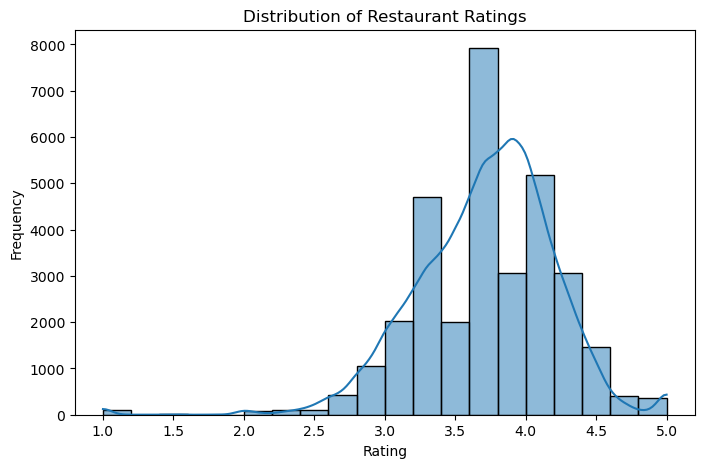

In [37]:
plt.figure(figsize=(8,5))
sns.histplot(df['rate'], bins=20, kde=True)
plt.title("Distribution of Restaurant Ratings")
plt.xlabel("Rating")
plt.ylabel("Frequency")
plt.show()

### 5.2 Top Restaurant Locations

This analysis identifies areas with the highest number of restaurants.


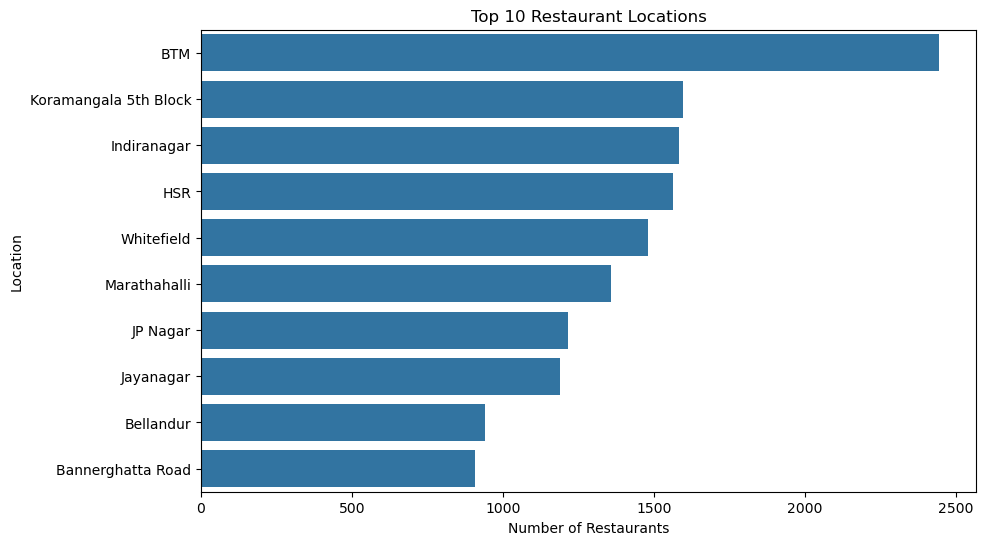

In [40]:
top_locations = df['location'].value_counts().head(10)

plt.figure(figsize=(10,6))
sns.barplot(x=top_locations.values, y=top_locations.index)
plt.title("Top 10 Restaurant Locations")
plt.xlabel("Number of Restaurants")
plt.ylabel("Location")
plt.show()

### 5.3 Most Popular Cuisines

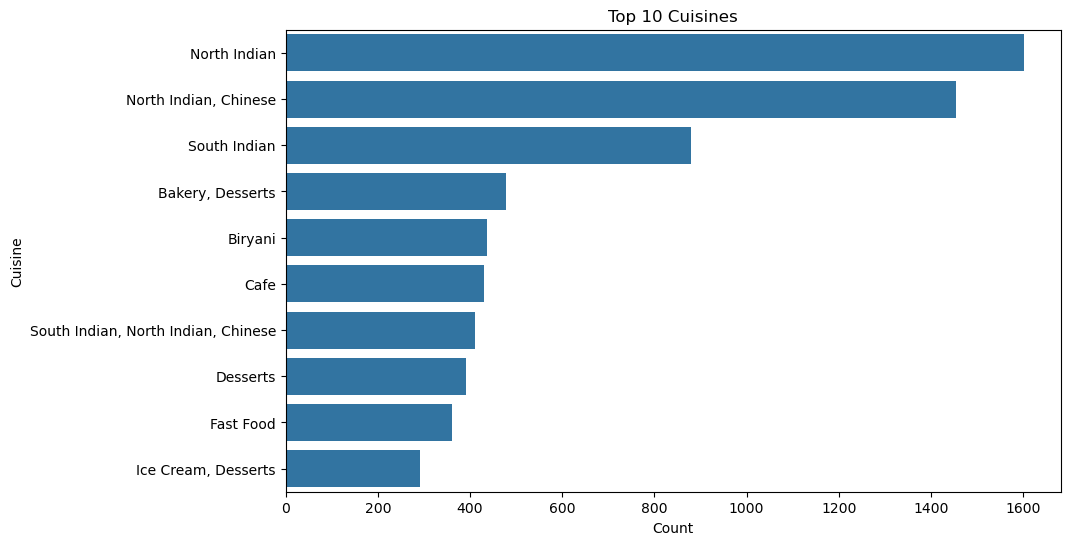

In [43]:
top_cuisines = df['cuisines'].value_counts().head(10)

plt.figure(figsize=(10,6))
sns.barplot(x=top_cuisines.values, y=top_cuisines.index)
plt.title("Top 10 Cuisines")
plt.xlabel("Count")
plt.ylabel("Cuisine")
plt.show()

### 5.4 Price vs Rating Analysis

In [57]:
df['approx_cost(for two people)'].dtype

dtype('O')

In [59]:
# Remove commas
df['approx_cost(for two people)'] = df['approx_cost(for two people)'].astype(str)
df['approx_cost(for two people)'] = df['approx_cost(for two people)'].str.replace(',', '')

# Convert to numeric safely
df['approx_cost(for two people)'] = pd.to_numeric(
    df['approx_cost(for two people)'], errors='coerce'
)

# Remove null values
df = df[df['approx_cost(for two people)'].notnull()]

# Remove extreme outliers (very important)
df = df[df['approx_cost(for two people)'] < 5000]

In [61]:
df['approx_cost(for two people)'].describe()

count    30700.000000
mean       613.506450
std        463.014449
min         40.000000
25%        300.000000
50%        500.000000
75%        750.000000
max       4500.000000
Name: approx_cost(for two people), dtype: float64

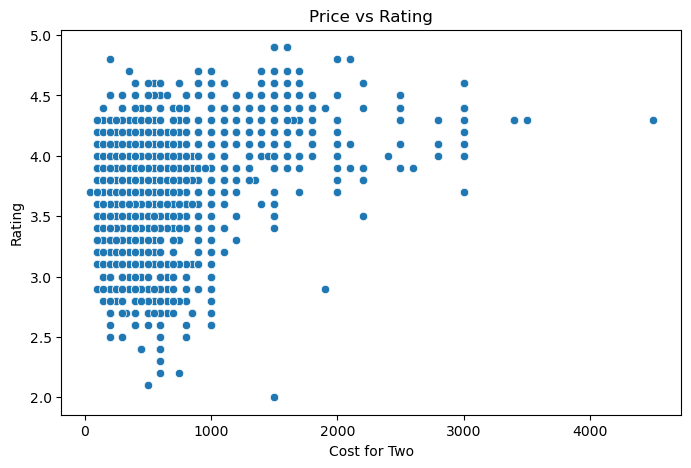

In [63]:
plt.figure(figsize=(8,5))

sns.scatterplot(
    x='approx_cost(for two people)',
    y='rate',
    data=df.sample(3000)   # only 3000 random rows
)

plt.title("Price vs Rating")
plt.xlabel("Cost for Two")
plt.ylabel("Rating")
plt.show()

In [66]:
df[['rate','approx_cost(for two people)']].corr()

,rate,approx_cost(for two people)
rate,1.000000,0.385836
approx_cost(for two people),0.385836,1.000000


Observation:

The correlation between cost and rating is 0.38, indicating a moderate positive relationship.
This suggests that higher-priced restaurants tend to have slightly higher ratings,
but cost alone does not strongly determine customer satisfaction.

### 5.6 Votes vs Rating Analysis

This analysis explores the relationship between customer engagement (votes) and ratings.


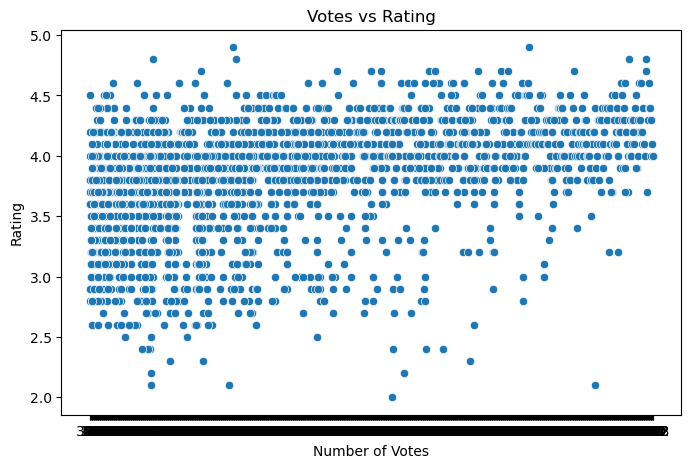

In [70]:
plt.figure(figsize=(8,5))
sns.scatterplot(x='votes', y='rate', data=df.sample(3000))
plt.title("Votes vs Rating")
plt.xlabel("Number of Votes")
plt.ylabel("Rating")
plt.show()

In [72]:
df[['rate','votes']].corr()

,rate,votes
rate,1.000000,0.430817
votes,0.430817,1.000000


Observation:

The correlation between votes and rating is 0.43, indicating a moderate positive relationship.
Restaurants with higher customer engagement (more votes) tend to have better ratings.
This suggests that popularity and customer satisfaction are positively related.

### 5.7 Top Restaurant Locations

This analysis identifies the most popular restaurant areas.


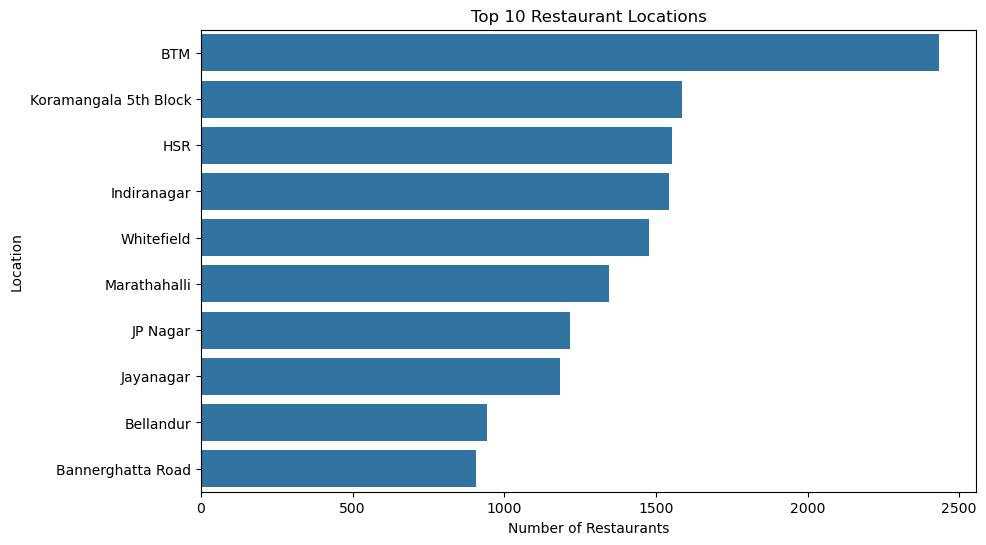

In [76]:
top_locations = df['location'].value_counts().head(10)

plt.figure(figsize=(10,6))
sns.barplot(x=top_locations.values, y=top_locations.index)
plt.title("Top 10 Restaurant Locations")
plt.xlabel("Number of Restaurants")
plt.ylabel("Location")
plt.show()

Observation:

BTM has the highest number of restaurants, followed by Koramangala 5th Block and HSR.
These areas represent major food hubs with high customer demand.
The concentration of restaurants suggests strong commercial and residential activity.

### 5.8 Most Popular Cuisines

This analysis identifies the most frequently offered cuisines.

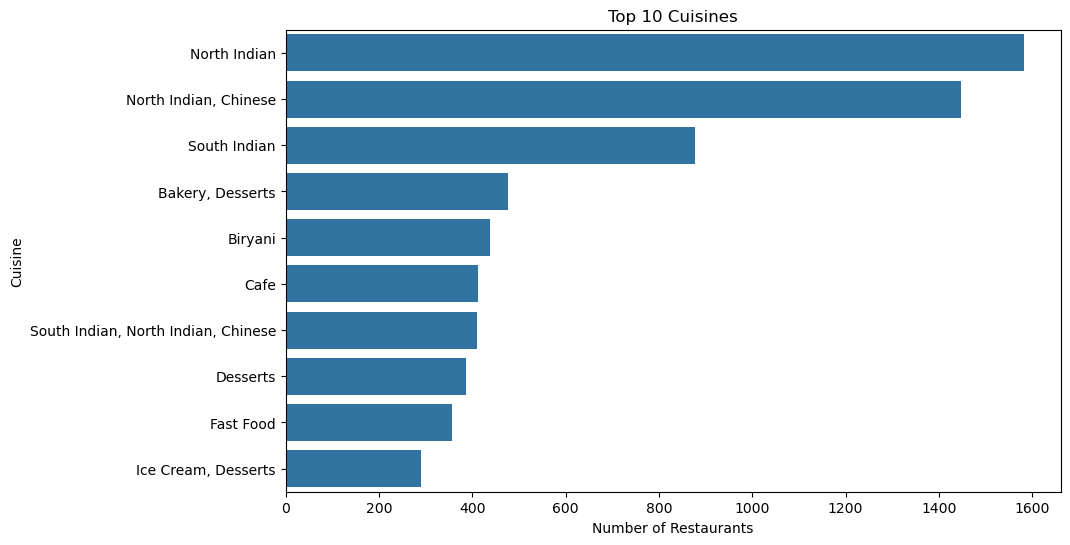

In [80]:
top_cuisines = df['cuisines'].value_counts().head(10)

plt.figure(figsize=(10,6))
sns.barplot(x=top_cuisines.values, y=top_cuisines.index)
plt.title("Top 10 Cuisines")
plt.xlabel("Number of Restaurants")
plt.ylabel("Cuisine")
plt.show()

Observation:

North Indian cuisine is the most dominant category, followed by combinations of North Indian and Chinese cuisines.
South Indian cuisine also holds a significant market share.
This indicates strong demand for traditional Indian food options.
Desserts, bakery, and biryani also show high popularity among customers.


## 6. Business Recommendations

1. Focus partnerships in high-density locations like BTM and Koramangala to maximize reach.

2. Promote North Indian and multi-cuisine restaurants prominently on the platform homepage.

3. Highlight high-vote restaurants, as popularity shows moderate positive correlation with ratings.

4. Introduce a "Value for Money" badge for mid-range restaurants with high ratings.

5. Use cuisine trend analytics to create personalized recommendations for users.

## 7. Conclusion

This analysis explored rating patterns, cost impact, customer engagement, location trends, and cuisine popularity.
The results show that votes have a stronger influence on ratings compared to cost.
North Indian cuisine dominates the market, and certain locations act as food hubs.
These insights can help food-tech platforms improve recommendation systems and business strategies.